# Paired Sample T-test

## Michael NANA KAMENI

Researchers conducted a random trial on the treatment of [fibromyalgia](http://www.nejm.org/doi/pdf/10.1056/NEJMoa0912611). Fibromyalgia is a condition where the body suffers from chronic, localized pain and as a result affects a sufferer's psyche among many other symptoms. There is no cure for fibromyalgia except to manage the pain. We obtained a dataset that has 50 observations and 11 variables. The variables are sex, BMI, duration of treatement, age, treatment,	coexists i.e. other health issues, FIQ_baseline, FIQ_12W, and FIQ_24W scores. Treatment is measured using the severity of the symptoms immediately before the treatment was started (FIQ-baseline) and after 12 weeks of treatment (FIQ-12W) and 24 weeks of treatment (FIQ-24W). Let us look to see if the tai chi treatment relieves pain after 12 weeks. That is, we want to determine if there is a difference in pain severity given the tai chi treatment. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
%matplotlib inline

In [3]:
data = pd.read_csv('taiChiData.csv', sep=',')

In [4]:
data

,Unnamed: 0,Id,sex,BMI,duration,age,treatment,coexists,FIQ_baseline,FIQ_12W,FIQ_24W
0,1,22,1,45.9,13.3,56.25,control,none,57.0,52.0,50.0
1,2,11,1,28.7,9.2,47.21,control,hypertension,85.0,88.0,85.0
2,3,36,1,35.5,6.7,59.56,tai chi,hypertension,83.0,68.0,68.0
3,4,1,1,29.8,17.1,43.44,control,diabetes,74.0,60.0,62.0
4,5,9,1,34.0,12.2,49.99,control,heart disease,68.0,55.0,56.0
5,6,21,1,39.2,5.5,41.32,tai chi,NaN,78.0,66.0,70.0
6,7,2,1,36.5,17.4,49.42,control,diabetes,NaN,58.0,57.0
7,8,19,1,28.1,11.7,51.72,control,none,60.0,54.0,54.0
8,9,32,1,38.8,14.5,36.95,tai chi,none,61.0,48.0,49.0
9,10,5,1,31.3,11.4,62.51,control,diabetes,63.0,59.0,61.0


We can split our observations into two groups according to the `treatment`, namely a control group and a tai chi group. But first clean the data a bit by removing null values and duplicates.

In [5]:
data.shape

(50, 11)

In [11]:
# enter code to drop rows with missing values 
data.drop_duplicates(inplace=True)  # drop duplicates
data.dropna(inplace=True)           # drop null values

In [12]:
data.isnull().sum()

Unnamed: 0      0
Id              0
sex             0
BMI             0
duration        0
age             0
treatment       0
coexists        0
FIQ_baseline    0
FIQ_12W         0
FIQ_24W         0
dtype: int64

In [13]:
treatment = data.groupby(['treatment'])

See this discussion for more on how to use the [groupby function](https://www.datacamp.com/community/tutorials/pandas-split-apply-combine-groupby).

In [14]:
type(treatment)

pandas.core.groupby.generic.DataFrameGroupBy

We cast the `pandas.core.groupby.DataFrameGroupBy` object to a list and extract the treatment groups from it and place them in new dataframes.

In [15]:
taichi  = list(treatment)[1][1]

In [17]:
print(type(taichi), len(taichi))

<class 'pandas.core.frame.DataFrame'> 13


### Visualizing the differences in treatment

Let's add the difference between the baseline scores and twelve weeks after treatment to the dataframe.

In [18]:
taichi['diff'] = taichi['FIQ_baseline'] - taichi['FIQ_12W']

In [19]:
taichi

,Unnamed: 0,Id,sex,BMI,duration,age,treatment,coexists,FIQ_baseline,FIQ_12W,FIQ_24W,diff
2,3,36,1,35.5,6.7,59.56,tai chi,hypertension,83.0,68.0,68.0,15.0
8,9,32,1,38.8,14.5,36.95,tai chi,none,61.0,48.0,49.0,13.0
14,15,34,0,20.8,3.3,43.69,tai chi,none,68.0,65.0,58.0,3.0
24,25,24,1,37.3,14.6,48.87,tai chi,diabetes,85.0,69.0,74.0,16.0
25,26,14,0,22.5,16.6,56.16,tai chi,hypertension,67.0,65.0,57.0,2.0
26,27,50,0,29.4,9.7,45.45,tai chi,hypertension,62.0,50.0,51.0,12.0
29,30,46,1,32.2,15.4,57.15,tai chi,none,76.0,62.0,67.0,14.0
30,31,25,1,36.8,17.3,48.31,tai chi,hypertension,54.0,50.0,43.0,4.0
32,33,27,1,40.9,14.2,44.90,tai chi,diabetes,54.0,43.0,40.0,11.0
33,34,41,0,30.6,18.0,43.26,tai chi,none,61.0,53.0,48.0,8.0


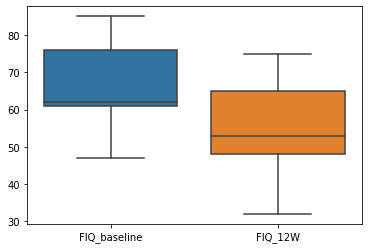

In [20]:
sns.boxplot(data=taichi.loc[:,['FIQ_baseline','FIQ_12W']])

The box plots show the decrease in pain severity after the 12 week treatment.

In [21]:
print(abs(taichi['FIQ_baseline'].mean() - taichi['FIQ_12W'].mean()))

10.23076923076924


On average, there is a difference in the pain severity before and after treatment of 10.23. Is this difference significant? 

### Formulate the hypothesis

We can now state our hypothesis. We are interested in whether there is no difference between the the severity of pain symptoms before the start of the tai chi treatment and after 12 weeks of the tai chi treatment. We state the null hypothesis as: 

$H_0$: $\mu_d = 0$ , i.e., the mean difference is zero.

$H_1$: $\mu_d \neq 0$, a two-tail test. There is a difference attributed to the tai chi treatment.


In [22]:
stats.ttest_rel(taichi['FIQ_baseline'], 
                taichi['FIQ_12W'])

Ttest_relResult(statistic=7.162209508658337, pvalue=1.1447801425115404e-05)

### Interpreting results

We obtain a $p \approx 0.000011$, which is less than the significance level $\alpha = 0.05.$ A low p-value indicates decreased support for the null hypothesis. We reject the null hypothesis. This means that the average pain score before treatment is significantly different from the average pain score after treatment with tai chi. However, we cannot rule out the possibility that the result we observed is a rare one.

### Exercise

Use the same steps as above to determine if there is a difference in the control treatment.  

In [29]:
control  = list(treatment)[0][1]
control

,Unnamed: 0,Id,sex,BMI,duration,age,treatment,coexists,FIQ_baseline,FIQ_12W,FIQ_24W
0,1,22,1,45.9,13.3,56.25,control,none,57.0,52.0,50.0
1,2,11,1,28.7,9.2,47.21,control,hypertension,85.0,88.0,85.0
3,4,1,1,29.8,17.1,43.44,control,diabetes,74.0,60.0,62.0
4,5,9,1,34.0,12.2,49.99,control,heart disease,68.0,55.0,56.0
7,8,19,1,28.1,11.7,51.72,control,none,60.0,54.0,54.0
9,10,5,1,31.3,11.4,62.51,control,diabetes,63.0,59.0,61.0
10,11,4,1,36.9,10.2,57.22,control,hypertension,50.0,46.0,43.0
12,13,3,1,32.2,14.1,40.47,control,none,82.0,70.0,76.0
15,16,7,1,31.2,13.4,41.02,control,heart disease,81.0,75.0,71.0
16,17,39,0,36.9,11.8,47.57,control,diabetes,80.0,76.0,81.0


In [30]:
control.shape

(26, 11)

## Visualizing the differences in treatment
Let's add the difference between the baseline scores and twelve weeks after treatment to the dataframe.

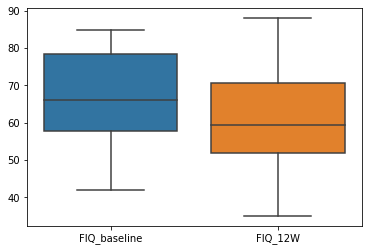

In [33]:
sns.boxplot(data=control.loc[:,['FIQ_baseline','FIQ_12W']])

The box plots show the decrease in pain severity after the 12 week treatment.

In [34]:
print(abs(control['FIQ_baseline'].mean() - control['FIQ_12W'].mean()))

5.192307692307693


On average, there is a difference in the pain severity before and after treatment of 5.19. Is this difference significant?

# Formulate the hypothesis
We can now state our hypothesis. We are interested in whether there is no difference between the the severity of pain symptoms before the start of the tai chi treatment and after 12 weeks of the tai chi treatment. We state the null hypothesis as:

$𝐻_0 :  \mu_𝑑=0$  , i.e., the mean difference is zero.

$𝐻_1 :  \mu_𝑑 \leq 0$, a two-tail test. There is a difference attributed to the control treatment.

In [36]:
stats.ttest_rel(control['FIQ_baseline'], 
                control['FIQ_12W'])

Ttest_relResult(statistic=6.685790452613529, pvalue=5.252249538170027e-07)

## Interpretation

We obtain a $p \approx 0.00000053$, which is less than the significance level $\alpha = 0.05.$ A low p-value indicates decreased support for the null hypothesis. We reject the null hypothesis. This means that the average pain score before treatment is significantly different from the average pain score after treatment with control. However, we cannot rule out the possibility that the result we observed is a rare one.